# Tokenizers

## HuggingFace Tokenizers
Hugging Face provides pre trained models that tokenize the text into tokens

<br/>

| Tokenizer Class       | Algorithm                                                 | Used By             | Trained With      |
| --------------------- | --------------------------------------------------------- | ------------------- | ----------------- |
| `BertTokenizer`       | WordPiece                                                 | BERT, DistilBERT    | Pretrained vocab  |
| `RobertaTokenizer`    | Byte-Pair Encoding (BPE)                                  | RoBERTa, XLM-R      | Pretrained vocab  |
| `GPT2Tokenizer`       | Byte-Level BPE                                            | GPT-2, GPT-J        | Trained on bytes  |
| `XLMRobertaTokenizer` | SentencePiece                                             | XLM-R, mBART, LaBSE | CC100             |
| `T5Tokenizer`         | SentencePiece                                             | T5, mT5             | C4 / multilingual |
| `AutoTokenizer`       | Auto-class that loads the correct tokenizer for any model | Any model           | -                 |


## Types of Tokenizers

### 1. Whitespace Tokenizer
Splits text into tokens using spaces as boundaries.
```bash
"This is an example."
→ ['This', 'is', 'an', 'example.']
```

<br/>

### 2. Rule-based Tokenizer
Uses custom rules (regex, Unicode categories, punctuation, etc.) to split text into words and punctuation.
```bash
"Hello, world!"
→ ['Hello', ',', 'world', '!']
```

<br/>

### 3. Character Tokenizer
Splits text into individual characters.
```bash
"hello" → ['h', 'e', 'l', 'l', 'o']
```

<br/>

### 4. Subword Tokenizer
#### 4.1 Byte-Pair Encoding (BPE)
- Start with characters.
- Count frequent adjacent pairs.
- Merge the most frequent pair.
- Repeat until you reach a fixed vocab size.
```bash
"lowest" → ['low', 'est']
```

<br/>

#### 4.2 WordPiece
Similar to BPE but chooses merges based on likelihood increase (not just frequency).
```bash
"unbelievable" → ['un', '##believable']
```

<br/>

#### 4.3 SentencePiece
- Works on raw text (no need to split into words before training).
- Treats text as a sequence of Unicode bytes.
- Adds space marker ▁ to mark word boundaries.
```bash
"tokenization" → ['▁to', 'ken', 'ization']
```

<br/>

### 5. Byte-Level BPE
- Encodes text as UTF-8 bytes
- Applies BPE merges on byte sequences
```bash
"hello" → ['Ġhe', 'llo']
```

<br/>

### 6. Unigram Language Model (used by SentencePiece)
- Learns probability distribution over subword units.
- Chooses the best segmentation by maximizing overall probability.


c:\Users\Lab\Desktop\KDD\myenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



Translations of English to English : A man is riding a bicycle on the street.

Translations of Urdu to English : A man is cycling on the road.

Translations of Arabic to English : A man rides a bike on the street.

Translations of Spanish to English : A man is riding a bicycle on the street.

Translations of French to English : A man bikes on the street.

Translations of German to English : A man rides a bike on the street.

Translations of Italian to English : A man is going by bicycle on the street.

Translations of Portuguese to English : A man is riding a bicycle on the street.

Translations of Russian to English : A man rides a bicycle along the street.

Translations of Chinese to English : A man is riding a bicycle on the street.

Translations of Japanese to English : A man is riding a bike on the street.

Translations of Korean to English : A man is riding a bike on the street.

Translations of Hindi to English : A man is riding a bicycle on the road.

Translations of Bengali t

C:\Users\Lab\AppData\Local\Temp\ipykernel_34836\761500698.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Language", y="Token Count", palette="viridis")


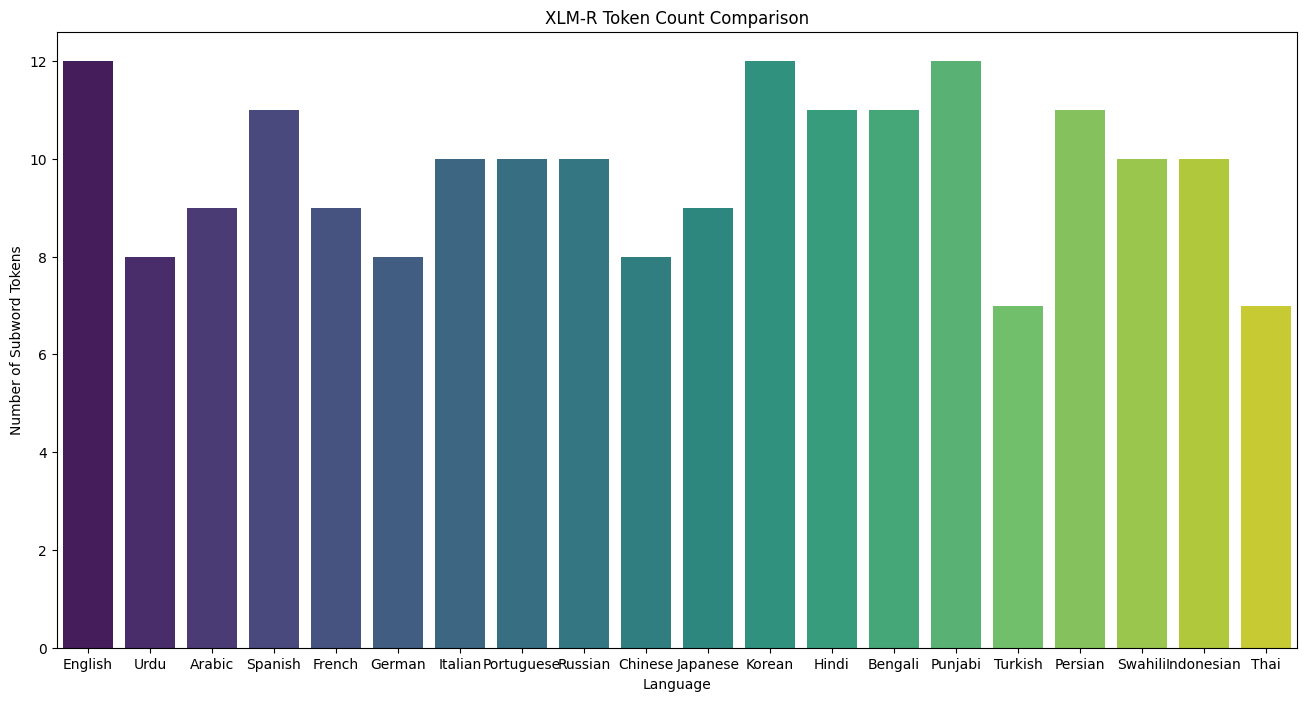

In [1]:
from transformers import AutoTokenizer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from deep_translator import GoogleTranslator

# Step 1: Initialize XLM-R tokenizer
tokenizer = AutoTokenizer.from_pretrained("xlm-roberta-base")

# Step 2: Sample sentences in different languages
samples = {
    "English": "A man is riding a bicycle on the street.",
    "Urdu": "ایک آدمی سڑک پر سائیکل چلا رہا ہے۔",
    "Arabic": "رجل يركب دراجة في الشارع.",
    "Spanish": "Un hombre está montando una bicicleta en la calle.",
    "French": "Un homme fait du vélo dans la rue.",
    "German": "Ein Mann fährt auf der Straße Fahrrad.",
    "Italian": "Un uomo sta andando in bicicletta per strada.",
    "Portuguese": "Um homem está andando de bicicleta na rua.",
    "Russian": "Мужчина едет на велосипеде по улице.",
    "Chinese": "一个男人正在街上骑自行车。",
    "Japanese": "男の人が通りで自転車に乗っています。",
    "Korean": "한 남자가 거리에서 자전거를 타고 있습니다.",
    "Hindi": "एक आदमी सड़क पर साइकिल चला रहा है।",
    "Bengali": "একজন মানুষ রাস্তার উপর সাইকেল চালাচ্ছে।",
    "Punjabi": "ਇੱਕ ਆਦਮੀ ਸੜਕ 'ਤੇ ਸਾਈਕਲ ਚਲਾ ਰਿਹਾ ਹੈ।",
    "Turkish": "Bir adam caddede bisiklet sürüyor.",
    "Persian": "مردی در خیابان دوچرخه‌سواری می‌کند.",
    "Swahili": "Mwanaume anaendesha baiskeli barabarani.",
    "Indonesian": "Seorang pria sedang mengendarai sepeda di jalan.",
    "Thai": "ผู้ชายกำลังขี่จักรยานบนถนน"
}

# Step 3: Tokenize and count tokens
data = []
for lang, text in samples.items():
    tokens = tokenizer.tokenize(text)
    data.append({"Language": lang, "Token Count": len(tokens), "Tokens": tokens})
    sentence_reconstructed = tokenizer.convert_tokens_to_string(tokens)
    translation = GoogleTranslator(source='auto', target='en').translate(sentence_reconstructed)
    print(f"\nTranslations of {lang} to English : {translation}")


df = pd.DataFrame(data)

# Step 4: Display counts and sample tokens
print(df[["Language","Token Count"]])
for i, row in df.iterrows():
    print(f"\n{row['Language']} tokens:", row["Tokens"])

# Step 5: Visualize token count distribution
plt.figure(figsize=(16, 8))
sns.barplot(data=df, x="Language", y="Token Count", palette="viridis")
plt.title("XLM‑R Token Count Comparison")
plt.ylabel("Number of Subword Tokens")

plt.show()


Custom Urdu (or any other language that use Spaces) Rule based Tokenizer

In [22]:
def simple_tokenize_urdu(text):
    tokens = []
    current_token = []

    for char in text:
        if char.isalpha():
            current_token.append(char)
        else:
            if current_token:
                tokens.append(''.join(current_token))
                current_token = []
            if not char.isspace():
                tokens.append(char)

    if current_token:
        tokens.append(''.join(current_token))
    return tokens

samples = {
    "English": "A man is riding a bicycle on the street.",
    "Urdu": "ایک آدمی سڑک پر سائیکل چلا رہا ہے۔",
    "Arabic": "رجل يركب دراجة في الشارع.",
    "Spanish": "Un hombre está montando una bicicleta en la calle.",
    "French": "Un homme fait du vélo dans la rue.",
    "German": "Ein Mann fährt auf der Straße Fahrrad.",
    "Italian": "Un uomo sta andando in bicicletta per strada.",
    "Portuguese": "Um homem está andando de bicicleta na rua.",
    "Russian": "Мужчина едет на велосипеде по улице.",
    "Chinese": "一个男人正在街上骑自行车。",
    "Japanese": "男の人が通りで自転車に乗っています。",
    "Korean": "한 남자가 거리에서 자전거를 타고 있습니다.",
    "Hindi": "एक आदमी सड़क पर साइकिल चला रहा है।",
    "Bengali": "একজন মানুষ রাস্তার উপর সাইকেল চালাচ্ছে।",
    "Punjabi": "ਇੱਕ ਆਦਮੀ ਸੜਕ 'ਤੇ ਸਾਈਕਲ ਚਲਾ ਰਿਹਾ ਹੈ।",
    "Turkish": "Bir adam caddede bisiklet sürüyor.",
    "Persian": "مردی در خیابان دوچرخه‌سواری می‌کند.",
    "Swahili": "Mwanaume anaendesha baiskeli barabarani.",
    "Indonesian": "Seorang pria sedang mengendarai sepeda di jalan.",
    "Thai": "ผู้ชายกำลังขี่จักรยานบนถนน"
}

for lang, text in samples.items():
    print(f"{lang} Tokenization : {simple_tokenize_urdu(text)}")


English Tokenization : ['A', 'man', 'is', 'riding', 'a', 'bicycle', 'on', 'the', 'street', '.']
Urdu Tokenization : ['ایک', 'آدمی', 'سڑک', 'پر', 'سائیکل', 'چلا', 'رہا', 'ہے', '۔']
Arabic Tokenization : ['رجل', 'يركب', 'دراجة', 'في', 'الشارع', '.']
Spanish Tokenization : ['Un', 'hombre', 'está', 'montando', 'una', 'bicicleta', 'en', 'la', 'calle', '.']
French Tokenization : ['Un', 'homme', 'fait', 'du', 'vélo', 'dans', 'la', 'rue', '.']
German Tokenization : ['Ein', 'Mann', 'fährt', 'auf', 'der', 'Straße', 'Fahrrad', '.']
Italian Tokenization : ['Un', 'uomo', 'sta', 'andando', 'in', 'bicicletta', 'per', 'strada', '.']
Portuguese Tokenization : ['Um', 'homem', 'está', 'andando', 'de', 'bicicleta', 'na', 'rua', '.']
Russian Tokenization : ['Мужчина', 'едет', 'на', 'велосипеде', 'по', 'улице', '.']
Chinese Tokenization : ['一个男人正在街上骑自行车', '。']
Japanese Tokenization : ['男の人が通りで自転車に乗っています', '。']
Korean Tokenization : ['한', '남자가', '거리에서', '자전거를', '타고', '있습니다', '.']
Hindi Tokenization : ['एक', 